# Import Packages
-------

In [ ]:
pip install jieba

In [ ]:
pip install imageio

In [ ]:
pip install wordcloud

In [ ]:
pip install SnowNLP

In [ ]:
pip install Pillow

In [1]:
import codecs
import re
import jieba
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import seaborn as sns
from pylab import *
from PIL import Image

# Text Analysis
------------

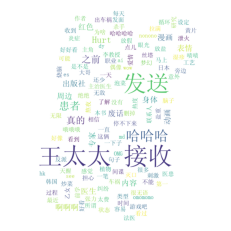

In [7]:
file = open("王太太🧸🍯💙_20220907_201544.txt", encoding = 'utf-8')

text = file.read()
file.close()

seg_str = jieba.cut(text, cut_all = False)
liststr = "/".join(seg_str)

f_stop = open('cn_stopwords.txt', encoding = 'utf8')
f_stop_text = f_stop.read()
f_stop.close()

mywordlist = []
f_stop_seg_list = f_stop_text.split('\n')

for myword in liststr.split('/'):
    if not(myword.strip() in f_stop_seg_list)and len(myword.strip())>1:
        mywordlist.append(myword)

ss = ' '.join(mywordlist)

bg = "Bunnies.jpeg"
imgbg = imread(bg)
a = WordCloud(font_path = "simsun.ttf", background_color = 'white', width = 1000, height = 800, mask = imgbg)
a.generate(ss)

plt.imshow(a)
plt.axis("off")
plt.show()
a.to_file('wc1.png')

In [ ]:
原文链接：https://blog.csdn.net/m0_56953187/article/details/124003824

## Text Clean Up 🤔

corpus = []
file = codecs.open("王太太🧸🍯💙_20220907_201544.txt","r","utf-8")

for line in file.readlines():
    corpus.append(line.strip())
    stripcorpus = corpus.copy()
stripcorpus = corpus.copy()

for i in range(len(corpus)):
    stripcorpus[i] = re.sub("@([\s\S]*?):","",corpus[i])  # get rid of @ ...：
    stripcorpus[i] = re.sub("\[([\S\s]*?)\]","",stripcorpus[i])  # [...]：
    stripcorpus[i] = re.sub("@([\s\S]*?)","",stripcorpus[i])  # get rid of @... 
    stripcorpus[i] = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+","",stripcorpus[i])  # 
 
#Divide words
stoplist = open('cn_stopwords.txt','r',encoding = 'utf-8').read()
result = []

for comments in stripcorpus:
    jieba.load_userdict("Self Defined Dictionary.txt")
    c_words = jieba.cut(comments)
    result.append([word for word in c_words if word not in stoplist and len(word)>1])

# Sentimental Analysis
-------